# Reparando dados ruins

## Carregando planilhas com buracos

Em alguns casos, as planilhas feitas para leitura humana não estão de acordo com o que precisamos para analisá-las computacionalmente, por exemplo:

In [2]:
import pandas as pd
df = pd.read_excel("../resources/livrovermelho2013occurrences2016-08-23-1308-failed.xls")

In [3]:
df.head(5)

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,NaN,NaN,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,NaN,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,NaN,NaN,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,NaN,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,NaN,NaN,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,NaN,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,NaN,NaN,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."


## Preenchendo Lacunas

Existem muitas células vazias, a ideia é que quando uma pessoa analisa esses dados, visualmente, ela sabe o que está vendo, é fácil entender o agrupamento. Mas ao analisar os dados com o pandas (ou outra ferramenta) teremos problemas identificando o valor das céclulas vazias, pois computacionalmente precisaríamos da visão global, e não linha a linha.

In [9]:
import math

def rename_by_visual_group(df, column_name):
    s = df[column_name].copy()

    last_val = ''

    for i, v in s.iteritems():
        if type(v) is not str and math.isnan(v):
            s[i] = last_val
        else:
            last_val = v
    
    df[column_name] = s
    
    return df

### Família aceita

In [77]:
rename_by_visual_group(df, 'familia aceita').head(10)

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,NaN,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,NaN,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,NaN,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,NaN,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,NaN,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,NaN,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,NaN,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,NaN,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,NaN,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,NaN,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,NaN,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,NaN,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,NaN,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,NaN,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,NaN,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


### Nome aceito

Vemos agora que a primeira coluna foi preenchida de acordo com o que esperávamos para a nossa análise visual. Podemos fazer o mesmo para as demais colunas problemátias.

In [78]:
rename_by_visual_group(df, 'nome aceito')

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,NaN,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,NaN,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,NaN,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,NaN,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,NaN,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,NaN,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,NaN,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,NaN,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


### Estado

In [79]:
rename_by_visual_group(df, 'estado')

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,ES,NaN,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,ES,NaN,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,ES,NaN,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,ES,NaN,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,ES,NaN,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,ES,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


### Município

In [80]:
rename_by_visual_group(df, 'município').head(10)

,familia aceita,nome aceito,id da ocorrência,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
0,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d7b2,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
1,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d839,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
2,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d8bb,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
3,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d93b,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,...,ES,Linhares,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
4,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3d9bc,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
5,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3da3d,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
6,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca1f3dabc,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
7,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca5212870,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,...,ES,São Mateus,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
8,ACANTHACEAE,Aphelandra espirito-santensis,54c7ca722d1e6,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,...,ES,São Mateus,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
9,ACANTHACEAE,Aphelandra gigantea,54c7ca1f3db3d,NaN,NaN,HSJRP,1753,597,W. Boone,1985,...,ES,Santa Teresa,"São João de Petrópolis, E.A.F.S.T.",-19.805556,-40.681389,ACANTHACEAE,Aphelandra gigantea,ok,True,"Arbusto rupícola, com flores de cálice verde e..."


## Mudando o id

In [10]:
# O id da ocorrência é um campo sem repetições, então, como campo sem repetições no dataframe, e já intrínseco aos dados, e melhor para ser um índice
df['id da ocorrência'].shape[0] == df['id da ocorrência'].unique().shape[0]

True

In [81]:
df.set_index('id da ocorrência', inplace=True)

In [83]:
df

,familia aceita,nome aceito,literatura,código da instituição,código da coleção,número de catálogo/código de barras,número do coletor,coletor,ano da coleta,mês da coleta,...,estado,município,localidade,latitude,longitude,família,nome científico,status SIG,válido,observações
id da ocorrência,,,,,,,,,,,,,,,,,,,,,
54c7ca1f3d7b2,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,287116,2110,"Martinelli, G.",1977,5.0,...,ES,São Mateus,Lagoa do Macaco. REBIO de Sooretama. Obs.: hel...,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN
54c7ca1f3d839,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35275,3381,"Kollmann, L.",2000,11.0,...,ES,Barra de São Francisco,"Córrego das Palmas, terreno de Roberto Strey.",-18.677231,-40.838108,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Erva rasteira na sombra. Folhas verdes escuras...
54c7ca1f3d8bb,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35287,3747,"Folli, D.A.",2000,11.0,...,ES,Linhares,"Reserva Natural CVRD, Estrada Peroba Osso, Km ...",-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Terrestre, herbáceo, botão amarelo, flor amare..."
54c7ca1f3d93b,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,35292,3304,"Folli, D.A.",1998,12.0,...,ES,Linhares,"Reserva Florestal, Estrada Municipal João Pedr...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Herbácea rastejante, botão amarelo, flor amare..."
54c7ca1f3d9bc,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533846,80,"Carvalho, A.M.V. de",1978,9.0,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Mata.,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Planta herbácea, esciófila com folhas verdes a..."
54c7ca1f3da3d,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533847,4993,"Martinelli, G.",1978,9.0,...,ES,Linhares,Reserva Florestal da CIA Vale do Rio Doce. Flo...,-19.161753,-39.934817,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Esciófila, crescendo na mata; folhas na face v..."
54c7ca1f3dabc,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533849,2285,"Martinelli, G.",1977,5.0,...,ES,São Mateus,Lagoa do Macuco. Reserva Biologica de Sooretama.,-19.017326,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,"Umbrófila, terrestre, estolonífera, crescendo ..."
54c7ca5212870,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,RB,533848,5701,"Sucre, D.",1969,7.0,...,ES,São Mateus,Mata de Tabuleiro do Macuco. Reserva Biologica...,-19.018155,-40.083059,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,Umbrófila; folha verde escuro brilhante na fac...
54c7ca722d1e6,ACANTHACEAE,Aphelandra espirito-santensis,NaN,NaN,NMNH,3376138.2125585,NaN,A. Carvalho,1978,9.0,...,ES,São Mateus,"Linhares Mun., Reserva Florestal da Cia, Vale ...",-19.137500,-40.063611,ACANTHACEAE,Aphelandra espirito-santensis,ok,True,NaN


## Limpando observações

In [84]:
df.observações.unique()

array([nan,
       'Erva rasteira na sombra. Folhas verdes escuras com nervuras brancas, flores laranjas.',
       'Terrestre, herbáceo, botão amarelo, flor amarela, Seiva Incolor',
       ...,
       'Projeto Bromélias MA: Táxons MA - Herbários, Restinga aberta. Pétalas avermelhadas em direção ao ápice. Hábito/Forma de vida: Erva terrestre. Luminosidade: Heliófila. Coordenadas geográficas da cidade ou vila mais próxima. ., Restinga aberta, Exsicata de ',
       'Projeto Bromélias MA: Táxons MA - Herbários, restinga. Elev.: 0. Coordenadas geográficas do ponto de coleta. ., restinga, Exsicata de planta',
       'Folhas vinosas com nuances esverdeados com estrias argênteas, especialmente na face dorsal, bainha castanho avermelhado; infl. passada de cor paleácea.'], dtype=object)

Alguns dados tem o campo **observações** com valor **NaN**, vou ajustá-los para que seja uma string vazia.

In [86]:
def clean_observacao(v):
    if type(v) is not str and math.isnan(v):
        return ''
    else:
        return v

df.observações = df.observações.apply(clean_observacao)

## Limpando Stagus SIG

O campo status SIG só tem dois valores possiveis e um valor indeterminado. Vou associar o valor **ok** a *True*, o valor **nok** a *False* e posso lidar com campos booleanos.

In [87]:
df['status SIG'].unique()

array(['ok', 'nok', nan], dtype=object)

In [12]:
df['status SIG'] = df['status SIG'].apply(lambda v: True if v == 'ok' else (False if v == 'nok' else None))

*Mês da coleta* possui um valor *NaN*, mas também possui um valor zero, o ideial é escolher um deles. Vou escolher 0.0, por que apesar de não fazer sentido como mês (Assim como *NaN*), pode ser ordenado facilmente com os demais.

NaN em Python tem problemas com ordenação, uma boa explicação pode ser vista [neste link](https://stackoverflow.com/a/7165183/2599861) do StackOverflow:
> In any language, sort applies a given ordering, defined by a comparison function or in some other way, over the domain of the input values. For example, less-than, a.k.a. operator <, could be used throughout if and only if less than defines a suitable ordering over the input values. 
But this is specifically NOT true for floating point values and less-than: "NaN is unordered: it is not equal to, greater than, or less than anything, including itself." (Clear prose from GNU C manual, but applies to all modern IEEE754 based floating point)
So the possible solutions are:
 * remove the NaNs first, making the input domain well defined via < (or the other sorting function being used)
 * define a custom comparison function (a.k.a. predicate) that does define an ordering for NaN, such as less than any number, or greater than any number.

## Datas

### Mês da coleta

In [15]:
meses = list(df['mês da coleta'].unique())
meses.sort()
meses

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 23, 60, 71]

Aqui substituo *NaN* por 0 (inteiro) e altero os demais para inteiro

In [16]:
df['mês da coleta'] = df['mês da coleta'].apply(lambda v: 0 if math.isnan(v) else math.ceil(v) )
df['mês da coleta']

0         5
1        11
2        11
3        12
4         9
5         9
6         5
7         7
8         9
9         7
10        5
11        8
12        7
13        4
14        9
15        0
16       11
17        4
18        5
19        6
20        4
21        4
22        7
23        6
24        7
25        5
26        6
27        6
28        0
29        7
         ..
65505     5
65506     2
65507     1
65508     0
65509     0
65510     0
65511     4
65512     4
65513     4
65514     3
65515     8
65516     8
65517     2
65518     5
65519     5
65520     2
65521     5
65522     1
65523     1
65524    12
65525     1
65526     3
65527    12
65528     0
65529     1
65530     0
65531     1
65532    12
65533     3
65534     0
Name: mês da coleta, Length: 65535, dtype: int64

Alguns dados têm meses de coleta maior que 12, vou anular o campo de validade

In [17]:
def invalidate_by_month(row):
    return False if row['mês da coleta'] > 12 else row.válido
    
df.válido = df.T.apply(invalidate_by_month)

In [94]:
df[df['mês da coleta'] <= 12][df['mês da coleta'] > 0][['mês da coleta', 'válido']].head(8)

/home/claudino/Projetos/pythonOnRioXXII-IA/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,mês da coleta,válido
id da ocorrência,,
54c7ca1f3d7b2,5,True
54c7ca1f3d839,11,True
54c7ca1f3d8bb,11,True
54c7ca1f3d93b,12,True
54c7ca1f3d9bc,9,True
54c7ca1f3da3d,9,True
54c7ca1f3dabc,5,True
54c7ca5212870,7,True


In [95]:
df[df['mês da coleta'] > 12][['mês da coleta', 'válido']].head(8)

,mês da coleta,válido
id da ocorrência,,
54c7ca2a440b7,13,False
54c7ca35d504f,20,False
54c7ca3eddae6,23,False
54c7ca423e80b,60,False
54c7ca4bf2766,71,False
54c7cb01d6f16,71,False


In [96]:
df[df['mês da coleta'] == 0][['mês da coleta', 'válido']].head(8)

,mês da coleta,válido
id da ocorrência,,
54c7ca1f3de39,0,True
54c7cb5c3610c,0,True
54c7ca1f3e2ca,0,False
54c7ca1f3e3c6,0,False
54c7ca1f3e443,0,False
54c7ca1f3e4c0,0,False
54c7ca67f2090,0,False
54c7ca692dfa3,0,False


### Dia da coleta
Aqui vou trabalhar com o dia da coleta

In [19]:
df['dia da coleta'].unique()

array([  1.50000000e+01,   2.30000000e+01,   2.10000000e+01,
         1.00000000e+00,   2.60000000e+01,   1.70000000e+01,
         1.20000000e+01,   2.50000000e+01,   3.00000000e+00,
         2.40000000e+01,              nan,   8.00000000e+00,
         2.70000000e+01,   2.00000000e+01,   6.00000000e+00,
         9.00000000e+00,   3.00000000e+01,   4.00000000e+00,
         5.00000000e+00,   1.30000000e+01,   1.60000000e+01,
         1.80000000e+01,   2.80000000e+01,   1.10000000e+01,
         2.90000000e+01,   1.40000000e+01,   2.00000000e+00,
         1.90000000e+01,   2.20000000e+01,   1.00000000e+01,
         3.10000000e+01,   7.00000000e+00,   0.00000000e+00,
         1.93400000e+03,   1.98200000e+03,   3.20000000e+01])

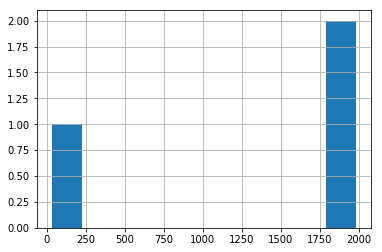

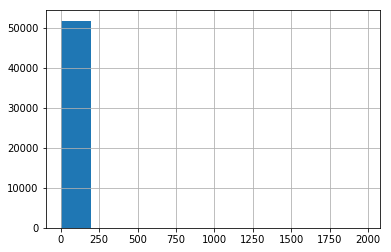

In [20]:
import matplotlib.pyplot as plt

df['dia da coleta'][lambda v: v > 31].hist()
plt.show()
df['dia da coleta'].hist()
plt.show()


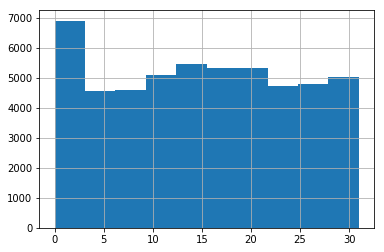

In [21]:
df['dia da coleta'][lambda v: v <= 31].hist()
plt.show()

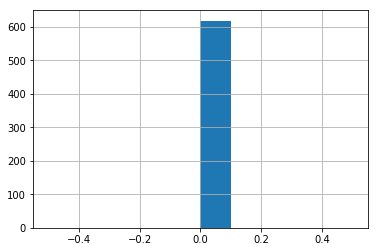

In [22]:
df['dia da coleta'][lambda v: v == 0].hist()
plt.show()

Temos dias iguais a 0, estes valores devem ter a cláusula de validade nula, outros acima de 31 estes precisam ser anulados.

In [54]:
def invalidate_by_day(row):
    return None if row['dia da coleta'] == 0 else (False if row['dia da coleta'] > 31 or math.isnan(row['dia da coleta']) else row.válido)
    
df.válido = df.T.apply(invalidate_by_day)

In [55]:
df[(df['dia da coleta'] > 31) | (df['dia da coleta'] == 0)][['dia da coleta', 'válido']].head(10)

,dia da coleta,válido
id da ocorrência,,
54c7ca870687f,0.0,None
54c7ca8704319,0.0,None
54c7ca8705b2e,0.0,None
54c7ca8ef2489,0.0,None
54c7cab0f3e78,0.0,None
54c7cb6fdc54e,1934.0,False
54c7cab7e66a1,0.0,None
54c7cab0f3c5d,0.0,None
54c7caa82cab6,0.0,None


In [56]:
df[(df['dia da coleta'] < 31) & (df['dia da coleta'] != 0)][['dia da coleta', 'válido']].head(10)

,dia da coleta,válido
id da ocorrência,,
54c7ca1f3d7b2,15.0,False
54c7ca1f3d839,23.0,False
54c7ca1f3d8bb,21.0,False
54c7ca1f3d93b,1.0,False
54c7ca1f3d9bc,26.0,False
54c7ca1f3da3d,26.0,False
54c7ca1f3dabc,15.0,False
54c7ca5212870,17.0,False
54c7ca722d1e6,26.0,False


In [97]:
df.columns

Index(['familia aceita', 'nome aceito', 'literatura', 'código da instituição',
       'código da coleção', 'número de catálogo/código de barras',
       'número do coletor', 'coletor', 'ano da coleta', 'mês da coleta',
       'dia da coleta', 'identificado por', 'estado', 'município',
       'localidade', 'latitude', 'longitude', 'família', 'nome científico',
       'status SIG', 'válido', 'observações'],
      dtype='object')

## Identificado pôr

In [98]:
df[['identificado por', 'válido']]

,identificado por,válido
id da ocorrência,,
54c7ca1f3d7b2,0,True
54c7ca1f3d839,S. Profice,True
54c7ca1f3d8bb,S. Profice,True
54c7ca1f3d93b,S. Profice,True
54c7ca1f3d9bc,NaN,True
54c7ca1f3da3d,NaN,True
54c7ca1f3dabc,NaN,True
54c7ca5212870,NaN,True
54c7ca722d1e6,NaN,True


Agora vou limpar o campo *identificado por*, transformando **NaN** em string vazia

In [99]:
df['identificado por'] = df['identificado por'].apply(lambda v: "" if type(v) is not str and math.isnan(v) else v)

temos um coletor de nome 0, vou transformar em vazio:

In [100]:
df[['identificado por', 'coletor']].head(8)

,identificado por,coletor
id da ocorrência,,
54c7ca1f3d7b2,0,"Martinelli, G."
54c7ca1f3d839,S. Profice,"Kollmann, L."
54c7ca1f3d8bb,S. Profice,"Folli, D.A."
54c7ca1f3d93b,S. Profice,"Folli, D.A."
54c7ca1f3d9bc,,"Carvalho, A.M.V. de"
54c7ca1f3da3d,,"Martinelli, G."
54c7ca1f3dabc,,"Martinelli, G."
54c7ca5212870,,"Sucre, D."


In [101]:
df['identificado por'] = df['identificado por'].apply(lambda v: "" if v == 0 else v)

In [103]:
df.loc[:, ['identificado por', 'coletor']].head(5)

,identificado por,coletor
id da ocorrência,,
54c7ca1f3d7b2,,"Martinelli, G."
54c7ca1f3d839,S. Profice,"Kollmann, L."
54c7ca1f3d8bb,S. Profice,"Folli, D.A."
54c7ca1f3d93b,S. Profice,"Folli, D.A."
54c7ca1f3d9bc,,"Carvalho, A.M.V. de"


## Literatura e *Código da Instituição*
Para finalziar, *literatura* e *código da instituição* possuem valores *NaN*, vou ajustá-los:

In [19]:
df.literatura.head(8)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
Name: literatura, dtype: object

In [108]:
df.literatura = df.literatura.apply(lambda v: "" if type(v) is not str and math.isnan(v) else v)
df.literatura.head(8)

id da ocorrência
54c7ca1f3d7b2    
54c7ca1f3d839    
54c7ca1f3d8bb    
54c7ca1f3d93b    
54c7ca1f3d9bc    
54c7ca1f3da3d    
54c7ca1f3dabc    
54c7ca5212870    
Name: literatura, dtype: object

In [109]:
df['código da instituição'].unique()

array([ nan])

Como todo esse campo é nulo, vou simplesmente apgá-lo

In [ ]:
df.drop('código da instituição', axis=1, inplace=True)

In [112]:
df.columns

Index(['familia aceita', 'nome aceito', 'literatura', 'código da coleção',
       'número de catálogo/código de barras', 'número do coletor', 'coletor',
       'ano da coleta', 'mês da coleta', 'dia da coleta', 'identificado por',
       'estado', 'município', 'localidade', 'latitude', 'longitude', 'família',
       'nome científico', 'status SIG', 'válido', 'observações'],
      dtype='object')

## Estados
Estados tem nomes confusos

In [113]:
df.estado.unique()

array(['ES', 'BA', 'MG', 'RJ', 'SC', 'MT', 'PR', 'SP', 'RR', 'DF', 'GO',
       'CE', 'RO', 'MS', 'RS', 'Espírito Santo', 'SE', 'AL', 'mg', 'TO',
       'Minas Gerais', 'Goiás', 'Distrito Federal', 'PE', 'PA', 'AM',
       'Mato Grosso Norte', 'PB', 'Centro', 'Bahia', 'RN',
       'Espirito Santo', 'AC', 'Alagoas', 'Ceará', 'Paraíba',
       'Mato Grosso', 'São Paulo', 'PI', 'Quatipuru', 'Pernambuco', 'MA',
       'Uf Nao Selecionada', 'Santa Catarina', 'Rio Grande do Sul',
       'Paraná', 'Tocantins', 'Rio de Janeiro', 'AP', 'ND', 'rj',
       'Corrientes', 'Barcelos', 'Mato Grosso do Sul', 'Mato Grosso Sul',
       'Yaracuy', 'Maranhão', 'Pará', 'Piauí', 'Amazonas', 'Oaxaca',
       'Chiapas', 'Cordillera', 'Guanabara', 'Buenos Aires', 'RondÃ´nia',
       'Rondônia', 'Merida', 'Misiones', 'Paraguarí', 'Piauhy', 'ba'], dtype=object)

In [114]:
get_none = lambda _: None

estado_replaces = [
    ('Minas Gerais', 'MG'),
    ('Goiás', 'GO'),
    ('Distrito Federal', 'DF'),
    ('Mato Grosso Norte', 'MT'),
    ('Centro', get_none),
    ('Bahia', 'BA'),
    ('Espirito Santo', 'ES'),
    ('São Paulo', 'SP'),
    ('Quatipuru', get_none),
    ('Pernambuco', 'PE'),
    ('Uf Nao Selecionada', '-'),
    ('Santa Catarina', 'SC'),
    ('Rio Grande do Sul', 'RS'),
    ('Paraná', 'PA'),
    ('Tocantins', 'TO'),
    ('Rio de Janeiro', 'RJ'),
    ('ND', '-'),
    ('rj', 'RJ'),
    ('Corrientes', get_none),
    ('Barcelos', get_none),
    ('Mato Grosso do Sul', 'MS'),
    ('Mato Grosso Sul', 'MS'),
    ('Yaracuy', get_none),
    ('Maranhão', 'MA'),
    ('Pará', 'PA'),
    ('Piauí', 'PI'),
    ('Amazonas', 'AM'),
    ('Oaxaca', get_none),
    ('Chiapas', get_none),
    ('Cordillera', get_none),
    ('Guanabara', get_none),
    ('Buenos Aires', get_none),
    ('RondÃ´nia', get_none),
    ('Rondônia', 'RO'),
    ('Merida', get_none),
    ('Misiones', get_none),
    ('Paraguarí', get_none),
    ('Piauhy', get_none),
    ('ba', 'BA'),
    ('Ceará', 'CE'),
    ('ParaíBA', 'PB'),
    ('Mato Grosso', 'MT'),
    ('Espírito Santo', 'ES'),
    ('mg', 'MG')]

In [115]:
for estado in estado_replaces:
    df.estado = df.estado.str.replace(*estado)

In [116]:
df.estado.unique()

array(['ES', 'BA', 'MG', 'RJ', 'SC', 'MT', 'PR', 'SP', 'RR', 'DF', 'GO',
       'CE', 'RO', 'MS', 'RS', 'SE', 'AL', 'TO', 'PE', 'PA', 'AM', 'PB',
       '', 'RN', 'AC', 'Alagoas', 'PI', 'MA', '-', 'AP'], dtype=object)

## Salvamento

In [117]:
df.to_pickle('../resources/dados_ajustados.npz', compression='gzip')

In [118]:
df.to_excel('../resources/dados_ajustados.xls')